In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")

from src.data_loader import get_data_adj
from src.portfolio_optimization import max_sharpe_portfolio, min_variance_portfolio
from src.backtesting import backtest_portfolio, rolling_backtest, compare_strategies

# Paramètres
tickers = ["AAPL", "MSFT", "TSLA", "GOOGL", "DIS"]
start_date = "2022-08-01"
end_date = "2024-07-31"

# 📥 Chargement des prix ajustés
prices = get_data_adj(tickers, start=start_date, end=end_date)
returns = np.log(prices / prices.shift(1)).dropna()


[*********************100%***********************]  5 of 5 completed


# Backtest à poids fixes

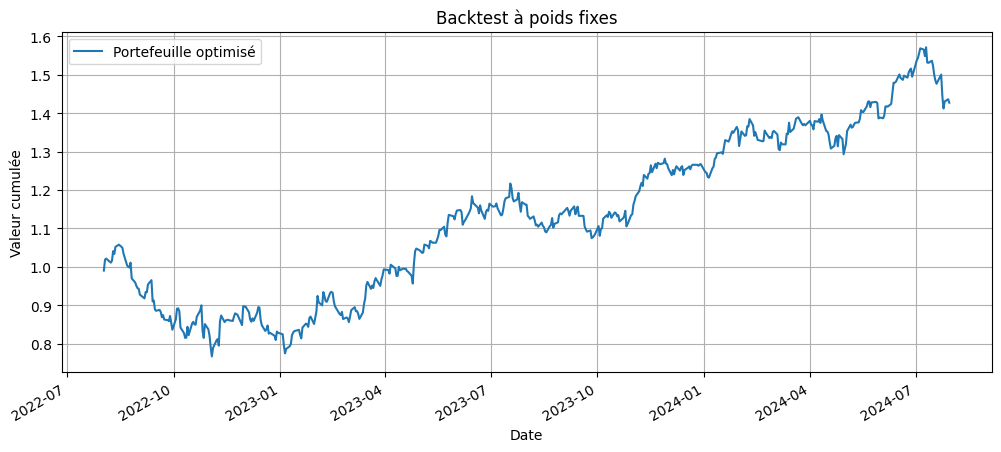

Volatilité annuelle : 0.24826319832664118
Sharpe ratio : 0.8451385433521313


In [15]:
# Optimisation sur toute la période
mu = returns.mean().values
cov = returns.cov().values
weights = max_sharpe_portfolio(mu, cov)

# Backtest statique
bt_results = backtest_portfolio(weights, returns)

# Visualisation
bt_results["Cumulative"].plot(figsize=(12, 5), label="Portefeuille optimisé")
plt.title("Backtest à poids fixes")
plt.ylabel("Valeur cumulée")
plt.grid()
plt.legend()
plt.show()

#  Statistiques
print("Volatilité annuelle :", bt_results["Volatility"].iloc[-1])
print("Sharpe ratio :", bt_results["Sharpe"].iloc[-1])


# Backtest avec rééquilibrage périodique

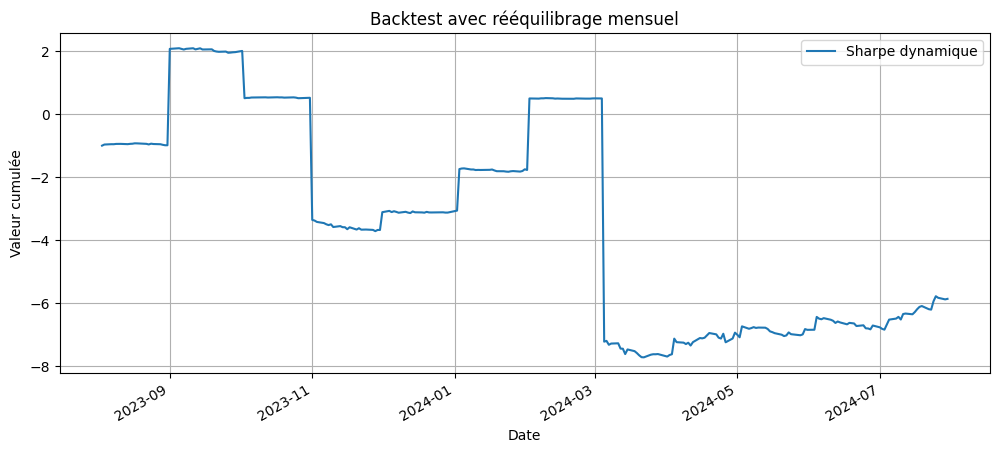

In [17]:
# Stratégie à passer dans rolling_backtest
def strategy_sharpe(mu, cov):
    return max_sharpe_portfolio(mu, cov)

# Backtest dynamique
rolling_perf = rolling_backtest(strategy_sharpe, returns, window_size=252, rebalance_freq=21)

# Visualisation
rolling_perf.plot(figsize=(12, 5), label="Sharpe dynamique")
plt.title("Backtest avec rééquilibrage mensuel")
plt.ylabel("Valeur cumulée")
plt.grid()
plt.legend()
plt.show()


# Comparaison de plusieurs stratégies

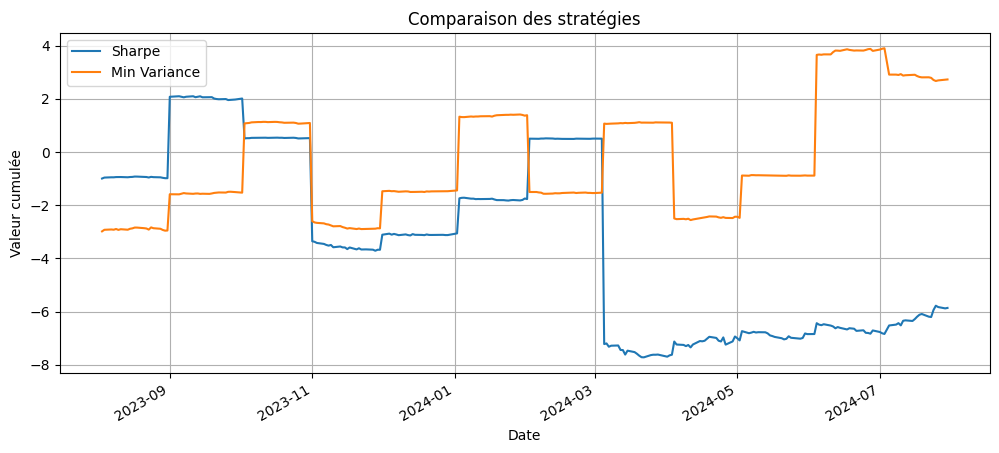

In [18]:
strategy_dict = {
    "Sharpe": strategy_sharpe,
    "Min Variance": lambda mu, cov: min_variance_portfolio(cov)
}

comparison = compare_strategies(strategy_dict, returns, window_size=252, rebalance_freq=21)

# 📈 Visualisation
comparison.plot(figsize=(12, 5), title="Comparaison des stratégies")
plt.ylabel("Valeur cumulée")
plt.grid()
plt.show()


In [8]:
def compute_stats(returns, name="Portefeuille"):
    ann_return = returns.mean() * 252
    ann_vol = returns.std() * np.sqrt(252)
    sharpe = (ann_return - 0.02) / ann_vol
    print(f"{name}")
    print(f"Rendement annuel : {ann_return:.2%}")
    print(f"Volatilité annuelle : {ann_vol:.2%}")
    print(f"Ratio de Sharpe : {sharpe:.2f}\n")

compute_stats(portfolio_returns, "Portefeuille optimisé")
compute_stats(benchmark_returns, "Benchmark égalitaire")


Portefeuille optimisé
Rendement annuel : -16.06%
Volatilité annuelle : 53.31%
Ratio de Sharpe : -0.34

Benchmark égalitaire
Rendement annuel : 10.36%
Volatilité annuelle : 19.76%
Ratio de Sharpe : 0.42

